In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


In [187]:
dataset = pd.read_csv('../../data/funda_train.csv')

In [188]:
dataset['year_month'] = dataset['transacted_date'].str.slice(stop=7)

In [189]:
drop_features = ['installment_term', 'region', 'type_of_business','card_company','transacted_time']
dataset = dataset.drop(drop_features, axis=1)

In [190]:
subset = dataset[['store_id','amount','year_month','card_id']]
subset

refund = subset[subset['amount'] < 0]
refund

,store_id,amount,year_month,card_id
41,0,-8571.428571,2016-06,40
347,0,-1857.142857,2016-08,285
731,0,-2000.000000,2016-10,473
831,0,-85.714286,2016-11,230
944,0,-57.142857,2016-11,138
...,...,...,...,...
6556242,2136,-13428.571429,2019-02,4663626
6556448,2136,-6928.571429,2019-02,4663760
6556485,2136,-5571.428571,2019-02,4663779
6556489,2136,-8571.428571,2019-02,4663780


In [191]:
dataset.iloc[refund.index[0] -1 : refund.index[0] + 1]

,store_id,card_id,transacted_date,amount,year_month
40,0,40,2016-06-10,8571.428571,2016-06
41,0,40,2016-06-10,-8571.428571,2016-06


In [192]:
refund_case_1 = []
for i in tqdm(range(len(refund.index))):
    subset = dataset.iloc[refund.index[i]-1 : refund.index[i] + 1]
    if subset['amount'].sum() == 0:
        refund_case_1.append(refund.index[i]) # 환불 건의 index 를 추출합니다. index 41과 같은 건을 모두 추출
    else:
        pass

100%|██████████| 73100/73100 [00:13<00:00, 5613.91it/s]


In [193]:
refund_case_2 = []
for i in tqdm(range(len(refund.index))):
    subset = dataset.iloc[refund.index[i]-1 : refund.index[i] + 1]
    if subset['amount'].sum() == 0:
        refund_case_2.append(refund.index[i]-1)  # 환불 전 결제 건의 index 를 추출합니다. index 40과 같은 건을 모두 추출
    else:
        pass

100%|██████████| 73100/73100 [00:12<00:00, 5811.60it/s]


In [194]:
print("refund_case_1 : {refund} refund_case_2 : {payment}".format(refund = len(refund_case_1), payment = len(refund_case_2)))
if len(refund_case_1) == len(refund_case_2):
    print("두 케이스 동일")

refund_case_1 : 55347 refund_case_2 : 55347
두 케이스 동일


In [195]:
sub_refund = refund.drop(index = refund_case_1, axis = 0)

print("기존 환불 건수 : {before} 드랍 후 환불 건수 : {after}".format(before = len(refund), after = len(sub_refund)))

기존 환불 건수 : 73100 드랍 후 환불 건수 : 17753


In [196]:
sub_dataset = dataset.drop(index = refund_case_2, axis = 0)

In [197]:
sub_refund[0:1]

,store_id,amount,year_month,card_id
3544,0,-5000.0,2018-07,1401


In [198]:
refund_case_31 = []
for i in range(len(sub_refund.index))[0:100]:
    subset = sub_dataset.loc[(sub_dataset['amount'] == abs(sub_refund.iloc[i].amount)) & (sub_dataset['card_id'] == (sub_refund.iloc[i].card_id))] # 환불 전 결제 케이스
    #refund_case_3.append(subset.index.min())
    print(subset)

      store_id  card_id transacted_date  amount year_month
3520         0     1401      2018-07-11  5000.0    2018-07
      store_id  card_id transacted_date  amount year_month
7389         1     2922      2018-06-14  1000.0    2018-06
      store_id  card_id transacted_date      amount year_month
8363         2     3613      2017-03-10  142.857143    2017-03
8375         2     3613      2017-03-21  142.857143    2017-03
8409         2     3613      2017-06-12  142.857143    2017-06
      store_id  card_id transacted_date      amount year_month
8363         2     3613      2017-03-10  142.857143    2017-03
8375         2     3613      2017-03-21  142.857143    2017-03
8409         2     3613      2017-06-12  142.857143    2017-06
      store_id  card_id transacted_date       amount year_month
8612         2     3781      2018-05-27  7857.142857    2018-05
      store_id  card_id transacted_date      amount year_month
8713         2     3852      2018-08-29  142.857143    2018-08
      

In [199]:
refund_case_3 = []
for i in tqdm(range(len(sub_refund.index))):
    subset = sub_dataset.loc[(sub_dataset['amount'] == abs(sub_refund.iloc[i].amount)) & (sub_dataset['card_id'] == (sub_refund.iloc[i].card_id))] # 환불 전 결제 케이스
    refund_case_3.append(subset.index.min())

100%|██████████| 17753/17753 [07:53<00:00, 37.47it/s]


In [200]:
refund_case_3 = [x for x in refund_case_3 if np.isnan(x) == False] # 해당 조건을 만족하는 환불건만 있고 결제건이 없을때 Nan이 리스트에 들어가므로 난을 제거

- -- -------------

In [201]:
refund_case_4 = list(sub_refund.index)

In [202]:
print("refund_case_3 : {before} refund_case_4 : {after}".format(before = len(refund_case_3), after = len(refund_case_4))) # 환불 케이스

refund_case_3 : 17657 refund_case_4 : 17753


In [203]:
len(dataset) - 73100*2 # 우리가 원하는 결과

6410413

In [204]:
dataset = dataset.drop(index = refund_case_1, axis = 0)
len(dataset)

6501266

In [205]:
dataset = dataset.drop(index = refund_case_2, axis = 0)
len(dataset)

6445919

In [206]:
dataset = dataset.drop(index = refund_case_3, axis = 0)
len(dataset)

6428813

In [207]:
dataset = dataset.drop(index = refund_case_4, axis = 0)
len(dataset)

6411060

In [208]:
overlap_test = list(set(refund_case_1).intersection(refund_case_3)) # 중복 index가 있는지 확인
overlap_test

[]

In [209]:
print("해결하지 못한 환불 건수 : {case}".format(case = len(dataset) - 6410413))

해결하지 못한 환불 건수 : 647


In [210]:
subset_2 = dataset[['store_id','amount','transacted_date']]
subset_2

,store_id,amount,transacted_date
0,0,1857.142857,2016-06-01
1,0,857.142857,2016-06-01
2,0,2000.000000,2016-06-01
3,0,7857.142857,2016-06-01
4,0,2000.000000,2016-06-02
...,...,...,...
6556606,2136,3928.571429,2019-02-28
6556609,2136,4142.857143,2019-02-28
6556610,2136,4500.000000,2019-02-28
6556611,2136,571.428571,2019-02-28


In [211]:
finalset_1=pd.DataFrame(data={'store_id': [],'amount' : [],'date' : []}) #스토어별 일별 매출집계

store = subset_2.loc[subset_2['store_id'] == 0]
finalset_1['amount'] = store.groupby(['transacted_date'])['amount'].agg('sum').values
finalset_1['date'] = store.groupby(['transacted_date'])['amount'].agg('sum').index
finalset_1['store_id'] = 0


for i in tqdm(subset_2['store_id'].unique()[1:]): # 시작은 1 고정

    tempset = pd.DataFrame(data={'store_id': [],'amount' : [],'date' : []})

    store_ = subset_2.loc[subset_2['store_id'] == i]

    tempset['amount'] = store_.groupby(['transacted_date'])['amount'].agg('sum').values
    tempset['date'] = store_.groupby(['transacted_date'])['amount'].agg('sum').index
    tempset['store_id'] = i

    finalset_1 = pd.concat([finalset_1,tempset], axis = 0)

finalset_1 = finalset_1.reset_index(drop=True)

100%|██████████| 1966/1966 [00:55<00:00, 35.44it/s]


In [165]:
finalset_1[finalset_1['store_id'] == 0]

,store_id,amount,date
0,0,12571.428571,2016-06-01
1,0,40571.428571,2016-06-02
2,0,18142.857143,2016-06-03
3,0,31714.285714,2016-06-04
4,0,10428.571429,2016-06-05
...,...,...,...
798,0,8571.428571,2019-02-23
799,0,38571.428571,2019-02-24
800,0,39714.285714,2019-02-25
801,0,9857.142857,2019-02-27


In [23]:
finalset=pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []}) #스토어별 매출집계

store = subset_2.loc[subset_2['store_id'] == 0]
finalset['amount'] = store.groupby(['year_month'])['amount'].agg('sum').values
finalset['year_month'] = store.groupby(['year_month'])['amount'].agg('sum').index
finalset['store_id'] = 0


for i in tqdm(subset_2['store_id'].unique()[1:]): # 시작은 1 고정

    tempset = pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []})

    store_ = subset_2.loc[subset_2['store_id'] == i]

    tempset['amount'] = store_.groupby(['year_month'])['amount'].agg('sum').values
    tempset['year_month'] = store_.groupby(['year_month'])['amount'].agg('sum').index
    tempset['store_id'] = i

    finalset = pd.concat([finalset,tempset], axis = 0)

finalset = finalset.reset_index(drop=True)

100%|██████████| 1966/1966 [00:41<00:00, 47.79it/s]


In [29]:
len(subset_2['store_id'].unique())

1967

In [24]:
finalset['datetime'] = pd.to_datetime(finalset['year_month'] + '-25', format='%Y-%m-%d')

In [25]:
finalset.to_csv('../../Data/finalset.csv')

In [214]:
finalset = pd.read_csv('../../Data/dailyamount.csv', index_col= 'Unnamed: 0')

In [215]:
finalset

,store_id,amount,date
0,0,12571.428571,2016-06-01
1,0,40571.428571,2016-06-02
2,0,18142.857143,2016-06-03
3,0,31714.285714,2016-06-04
4,0,10428.571429,2016-06-05
...,...,...,...
1282738,2136,85357.142857,2019-02-24
1282739,2136,37214.285714,2019-02-25
1282740,2136,47142.857143,2019-02-26
1282741,2136,65071.428571,2019-02-27


In [173]:
finalset['datetime'] = pd.to_datetime(finalset['year_month'] + '-25', format='%Y-%m-%d')

In [174]:
finalset = finalset.drop('year_month', axis = 1)
finalset

,store_id,amount,datetime
0,0,7.470000e+05,2016-06-25
1,0,1.005000e+06,2016-07-25
2,0,8.715714e+05,2016-08-25
3,0,8.978571e+05,2016-09-25
4,0,8.354286e+05,2016-10-25
...,...,...,...
60146,2136,2.012214e+06,2018-10-25
60147,2136,2.135429e+06,2018-11-25
60148,2136,2.427429e+06,2018-12-25
60149,2136,1.873643e+06,2019-01-25


In [216]:
# 1년치 미만 매출 데이터를 보유한 가게들의 데이터를 제거합니다.

for i in finalset['store_id'].unique():
    subset_5 = finalset.loc[finalset['store_id'] == i]
    if len(subset_5) < 360:
        print(i,"번째 가게 제외")
        finalset = finalset.drop(subset_5.index)
    else:
        pass

""" # 매출 데이터량(12개 미만)이 적은 가게를 필터링하는 함수 / 제거 알고리즘 구현해야함
n_store = 0

for i in finalset['store_id'].unique():
    subset_5 = finalset[finalset['store_id'] == i]
    if len(subset_5) < 12:
        print(i,"매출 데이터량이 너무 적습니다.")
        n_store += 1
    else:
        pass
print("매출 데이터량이 적은 가게의 수 : ", n_store) """

2 번째 가게 제외
20 번째 가게 제외
25 번째 가게 제외
69 번째 가게 제외
105 번째 가게 제외
106 번째 가게 제외
111 번째 가게 제외
154 번째 가게 제외
187 번째 가게 제외
210 번째 가게 제외
218 번째 가게 제외
232 번째 가게 제외
237 번째 가게 제외
238 번째 가게 제외
246 번째 가게 제외
248 번째 가게 제외
250 번째 가게 제외
257 번째 가게 제외
279 번째 가게 제외
295 번째 가게 제외
314 번째 가게 제외
332 번째 가게 제외
334 번째 가게 제외
341 번째 가게 제외
350 번째 가게 제외
353 번째 가게 제외
360 번째 가게 제외
372 번째 가게 제외
377 번째 가게 제외
389 번째 가게 제외
397 번째 가게 제외
412 번째 가게 제외
443 번째 가게 제외
447 번째 가게 제외
448 번째 가게 제외
459 번째 가게 제외
469 번째 가게 제외
479 번째 가게 제외
488 번째 가게 제외
506 번째 가게 제외
512 번째 가게 제외
515 번째 가게 제외
540 번째 가게 제외
554 번째 가게 제외
555 번째 가게 제외
557 번째 가게 제외
562 번째 가게 제외
576 번째 가게 제외
580 번째 가게 제외
599 번째 가게 제외
603 번째 가게 제외
614 번째 가게 제외
619 번째 가게 제외
632 번째 가게 제외
640 번째 가게 제외
660 번째 가게 제외
675 번째 가게 제외
677 번째 가게 제외
722 번째 가게 제외
725 번째 가게 제외
731 번째 가게 제외
733 번째 가게 제외
772 번째 가게 제외
788 번째 가게 제외
789 번째 가게 제외
795 번째 가게 제외
808 번째 가게 제외
810 번째 가게 제외
817 번째 가게 제외
841 번째 가게 제외
846 번째 가게 제외
847 번째 가게 제외
855 번째 가게 제외
856 번째 가게 제외
881 번째 가게 제외
883 번째 가게 제외
894 번째 가게 제외
899 

' # 매출 데이터량(12개 미만)이 적은 가게를 필터링하는 함수 / 제거 알고리즘 구현해야함\nn_store = 0\n\nfor i in finalset[\'store_id\'].unique():\n    subset_5 = finalset[finalset[\'store_id\'] == i]\n    if len(subset_5) < 12:\n        print(i,"매출 데이터량이 너무 적습니다.")\n        n_store += 1\n    else:\n        pass\nprint("매출 데이터량이 적은 가게의 수 : ", n_store) '

In [89]:
for i in tqdm(finalset['store_id'].unique()):
    subset_5 = finalset[finalset['store_id'] == i]
    if subset_5.tail(1)['datetime'].values != pd.to_datetime('2019-02-25', format='%Y-%m-%d'):
        finalset = finalset.drop(subset_5.index, axis = 0)
    else:
        pass

""" # 2019-02 월 데이터가 없는 가게를 필터링하는 함수 / 제거 알고리즘 구현해야함
n_store = 0

for i in finalset['store_id'].unique():
    subset_6 = finalset[finalset['store_id'] == i].tail(1)
    if subset_6['datetime'].values != finalset['datetime'][32]:
        print(i,"번째 가게는 최근 30일 간의 매출이 없습니다.")
        print(subset_6)
        n_store += 1
    else:
        pass
print("총 {store} 가게가 최근 매출이 없습니다.".format(store = n_store)) """

100%|██████████| 1966/1966 [00:02<00:00, 877.90it/s] 


' # 2019-02 월 데이터가 없는 가게를 필터링하는 함수 / 제거 알고리즘 구현해야함\nn_store = 0\n\nfor i in finalset[\'store_id\'].unique():\n    subset_6 = finalset[finalset[\'store_id\'] == i].tail(1)\n    if subset_6[\'datetime\'].values != finalset[\'datetime\'][32]:\n        print(i,"번째 가게는 최근 30일 간의 매출이 없습니다.")\n        print(subset_6)\n        n_store += 1\n    else:\n        pass\nprint("총 {store} 가게가 최근 매출이 없습니다.".format(store = n_store)) '

In [217]:
finalset

,store_id,amount,date
0,0,12571.428571,2016-06-01
1,0,40571.428571,2016-06-02
2,0,18142.857143,2016-06-03
3,0,31714.285714,2016-06-04
4,0,10428.571429,2016-06-05
...,...,...,...
1282738,2136,85357.142857,2019-02-24
1282739,2136,37214.285714,2019-02-25
1282740,2136,47142.857143,2019-02-26
1282741,2136,65071.428571,2019-02-27


In [218]:
# datetime type 을 datetime[ns]로 변경해야함
for i in tqdm(finalset['store_id'].unique()): 
    try:
        series  = finalset[finalset['store_id'] == i]
        model = auto_arima(np.array(series['amount']), start_p = 0, start_q = 0, supress_warnings=False)
        forecast_data = model.predict(n_periods = 90)

        subset_4 = pd.DataFrame(data={'store_id': [],'amount' : [],'datetime' : []})
        subset_4 = subset_4.append({'amount' : sum(forecast_data.tolist()[0:30]), 'datetime' : pd.to_datetime('2019-03-25', format='%Y-%m-%d')},  ignore_index=True)
        subset_4 = subset_4.append({'amount' : sum(forecast_data.tolist()[30:60]), 'datetime' : pd.to_datetime('2019-04-25', format='%Y-%m-%d')},  ignore_index=True)
        subset_4 = subset_4.append({'amount' : sum(forecast_data.tolist()[60:90]), 'datetime' : pd.to_datetime('2019-05-25', format='%Y-%m-%d')},  ignore_index=True)
        subset_4['store_id'] = i 

        finalset = pd.concat([finalset, subset_4], axis = 0)
        finalset = finalset.sort_values(by=['store_id','datetime']).reset_index(drop = True)
    except:
        print(i,'번째 가게에서 에러')
finalset

  0%|          | 7/1791 [00:42<4:14:11,  8.55s/it]

8 번째 가게에서 에러


  1%|          | 12/1791 [00:56<2:00:48,  4.07s/it]

In [180]:
finalset[finalset['datetime'] == '2019-03-25']

,store_id,amount,datetime
33,0,7.049922e+05,2019-03-25
69,1,1.608358e+05,2019-03-25
105,2,1.066178e+06,2019-03-25
141,4,9.969200e+05,2019-03-25
177,5,4.999851e+05,2019-03-25


In [68]:
finalset

,store_id,amount,datetime
0,0,7.470000e+05,2016-06-25
1,0,1.005000e+06,2016-07-25
2,0,8.715714e+05,2016-08-25
3,0,8.978571e+05,2016-09-25
4,0,8.354286e+05,2016-10-25
...,...,...,...
64785,2136,1.873643e+06,2019-01-25
64786,2136,2.227429e+06,2019-02-25
64787,2136,2.313651e+06,2019-03-25
64788,2136,2.313651e+06,2019-04-25


In [69]:
finalset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64790 entries, 0 to 64789
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   store_id  64790 non-null  int64         
 1   amount    64790 non-null  float64       
 2   datetime  64790 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 MB


In [18]:
finalset.to_csv('../../Data/submission.csv')

In [29]:
submission = pd.DataFrame(data={'store_id': [],'amount' : []})

In [44]:
submission['store_id'] = finalset['store_id'].unique().tolist()

In [114]:
model.order[0]

1

In [117]:
for i in tqdm(finalset['store_id'].unique()[0:40]): 
    series  = finalset.loc[finalset['store_id'] == i]
    model = auto_arima(np.array(series['amount']), start_p = 0, start_q = 0, supress_warnings=False)
    forecast_data = model.predict(n_periods=3)

    if model.order[0] == 0 and model.order[2] == 0:
        print(i)
        print(forecast_data)
        print(model.order)
    

  5%|▌         | 2/40 [00:00<00:05,  7.51it/s]

0
[732559.74025974 732559.74025974 732559.74025974]
(0, 0, 0)
1
[77428.57142857 77428.57142857 77428.57142857]
(0, 1, 0)


 12%|█▎        | 5/40 [00:01<00:08,  4.33it/s]

6
[2463857.14285715 2463857.14285715 2463857.14285715]
(0, 1, 0)


 25%|██▌       | 10/40 [00:01<00:04,  6.46it/s]

9
[492945.81280788 492945.81280788 492945.81280788]
(0, 0, 0)
10
[490484.47204969 490484.47204969 490484.47204969]
(0, 0, 0)


 30%|███       | 12/40 [00:02<00:05,  5.27it/s]

12
[310920. 310920. 310920.]
(0, 1, 0)


 38%|███▊      | 15/40 [00:03<00:07,  3.26it/s]

15
[749485.71428571 749485.71428571 749485.71428571]
(0, 1, 0)


 55%|█████▌    | 22/40 [00:05<00:05,  3.31it/s]

22
[232625. 232625. 232625.]
(0, 0, 0)


 60%|██████    | 24/40 [00:06<00:04,  3.80it/s]

25
[101314.28571429 101314.28571429 101314.28571429]
(0, 0, 0)


 78%|███████▊  | 31/40 [00:08<00:02,  4.40it/s]

32
[143105.36796537 143105.36796537 143105.36796537]
(0, 0, 0)


 88%|████████▊ | 35/40 [00:09<00:00,  5.34it/s]

36
[4879015.23809524 4879015.23809524 4879015.23809524]
(0, 0, 0)
37
[1442688.39285714 1442688.39285714 1442688.39285714]
(0, 0, 0)


 95%|█████████▌| 38/40 [00:10<00:00,  3.32it/s]

42
[545642.85714286 545642.85714286 545642.85714286]
(0, 1, 0)


100%|██████████| 40/40 [00:10<00:00,  3.68it/s]


In [66]:
submission['amount'] = store_amount

In [59]:
submission.to_csv('../../data/submission.csv')

<AxesSubplot:>

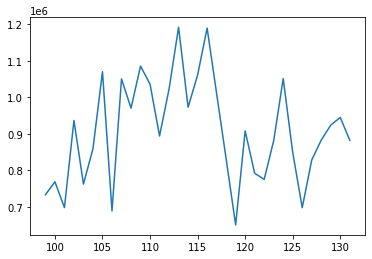

In [103]:
finalset[finalset['store_id'] == 4]['amount'].plot()


<AxesSubplot:>

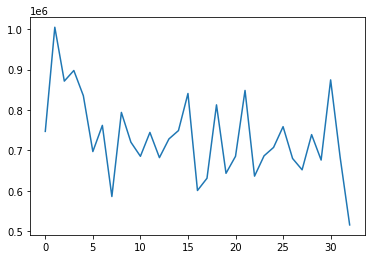

In [106]:
finalset[finalset['store_id'] == 0]['amount'].plot()